## Imports

In [1]:
from ipynb.fs.full._Functions import *

# Swap Test

The swap test can tell us if two registers are in the same state without measuring them, making it a pretty useful tool in bigger quantum algorithms or even by its own. However, it cannot tell us what state they are in, but it will tell us how similar two qubits (or registers) are.

### Description
$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$Let's say that we have two states, $\ket{q_1}$ and $\ket{q_2}$, along with one ancillary qubit, $\ket{a_0}$. We will not focus on the exact state the first two qubits are in, but on the state of the ancillary qubit (which will eventually give us the output we are looking for).

First, $\ket{a_0}$ goes through a Hadamard gate, leaving it in a state of equal superposition. So, the state of our entire circuit at this point is:

$$ \frac{1}{\sqrt{2}}(\ket{q_1q_20} + \ket{q_1q_21}) $$

Then, we apply the CSWAP gate with $\ket{a_0}$ as the control qubit. This changes the state of the circuit to:

$$ \frac{1}{\sqrt{2}}(\ket{q_1q_20} + \ket{q_2q_11})\textrm{, notice that} \ket{q_1} \textrm{and} \ket{q_2} \textrm{are swapped in the case that} \ket{a_0} = \ket{1} $$

Then, we apply the next Hadamard gate to $\ket{a_0}$, giving us:

$$ \frac{1}{2}(\ket{q_1q_20} + \ket{q_1q_21} + \ket{q_2q_10} - \ket{q_2q_11}) $$

Finally, we apply a Pauli-X gate to $\ket{a_0}$, giving us:

$$ \frac{1}{2}(\ket{q_1q_21} + \ket{q_1q_20} + \ket{q_2q_11} - \ket{q_2q_10}) $$

It may be hard to notice at first, but there is something very interesting about this final state we got to. Let's imagine for a second that |q1> = |q2>, and we wil denote this common state as |q>. With this in mind, the circuit of our state will simplify to:

$$ \frac{1}{2}(\ket{qq1} + \ket{qq0} + \ket{qq1} - \ket{qq0}) = \frac{1}{2}(2\ket{qq1}) = \ket{qq1} $$

This shows that whenever |q1> = |q2>, we will get |1> as an output of the ancillary qubit. Now, what happens when our states differ? Let's look at the simple example where |q1> = |0> and |q2> = |1>. In this case our final state will turn into:

$$ \frac{1}{2}(\ket{011} + \ket{010} + \ket{101} - \ket{100})\textrm{, and nothing can be simplified} $$

Thus, in the case that $\ket{q_1} \not= \ket{q_2}$, the ancillary qubit will have an equal chance of measuring $\ket{0}$ or $\ket{1}$. This results can be extended to registers of any $n$ qubits $\ket{q_1}$ and $\ket{q_2}$ rather than the single qubits we used to work through this example.

### Implementation

In the implementation of the swap test presented here, $\ket{q_1}$ and $\ket{q_2}$ are quantum registers of two qubits each. The circuit presented below first prepares the registers into their initial states (which we chose to be equal so $\ket{a_0}$ outputs $\ket{1}$) and then applies the same procedure described above, with the only difference that the CSWAP gate is applied for each qubit and its pair in the other register. The circuit looks as follows:

In [3]:
def swap_test():
    qreg_1  = QuantumRegister(2, 'q1')
    qreg_2  = QuantumRegister(2, 'q2')
    ancilla = QuantumRegister(1, 'a')
    acreg   = ClassicalRegister(1, 'c')
    qc      = QuantumCircuit(qreg_1, qreg_2, ancilla, acreg)

    # Initialize first two quantum registers to desired state
    qc.h(qreg_1[0])
    qc.x(qreg_1[1])
    qc.h(qreg_2[0])
    qc.x(qreg_2[1])

    # Swap test 
    qc.h(ancilla[0])
    for i in range(len(qreg_1)):
        qc.cswap(ancilla[0], qreg_1[i], qreg_2[i])
    qc.h(ancilla[0])
    qc.x(ancilla[0])

    # Measure ancilla qubit
    qc.measure(ancilla, acreg)
    
    # Return circuit
    return qc

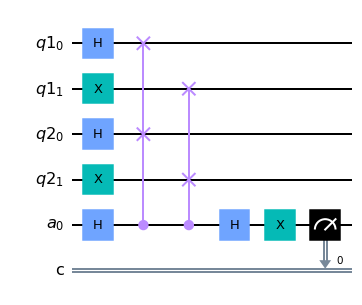

In [4]:
circ = swap_test()
draw(circ)

The more times we observe $\ket{1}$ as the output, the more certain we can be that the two registers are in the same state. The moment we get the state $\ket{0}$ as an output, we can be certain that the registers are **not** in an identical state.$^1$

Another way to look at the output of the swap test is a measure of how identical the two states you are comparing are. Getting a 50-50 distribution of states $\ket{0}$ and $\ket{1}$ tell us that the states are completely different, while measuring $\ket{1}$ all of the times tells us that the states are completely identical. Anything in between can be interpreted as the states being somewhat similar, where a distribution closer to 50-50 indicates less similarity and a distribution closer to 0-100 indicates more similarity. 

The histogram for this implementation of the swap test looks like this (we get the state $\ket{1}$ 100% of the time since the two registers are set to the same state and there is no noise from an actual quantum computer):

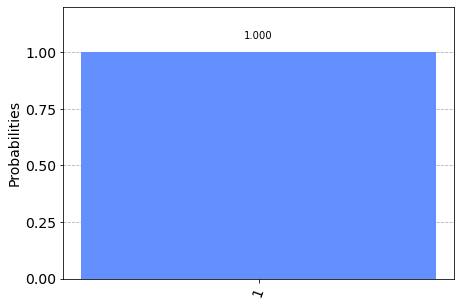

In [6]:
result, counts = run(circ)
plot_histogram(counts)

1: Note that to account for errors in the quantum computer itself we can allow some occurences of the state |0> and still be certain that the two registers are in the same state.

### Running on hardware

Running this circuit on hardware is possible, but it increases the amount of error drastically. This happens because CSWAP gates are not available in IBM's computers, so they have to be constructed from several other gates, therefore increasing the circuit's depth which increases the error rate. The circuit goes from containing 5 gates (we don't count the gates we use to prepare $\ket{q_1}$ and $\ket{q_2}$ because they are not part of the swap test itself) to containing 50+ gates. The following photo is what the circuit looks like when ran in IBM's Q16 Melbourne machine.

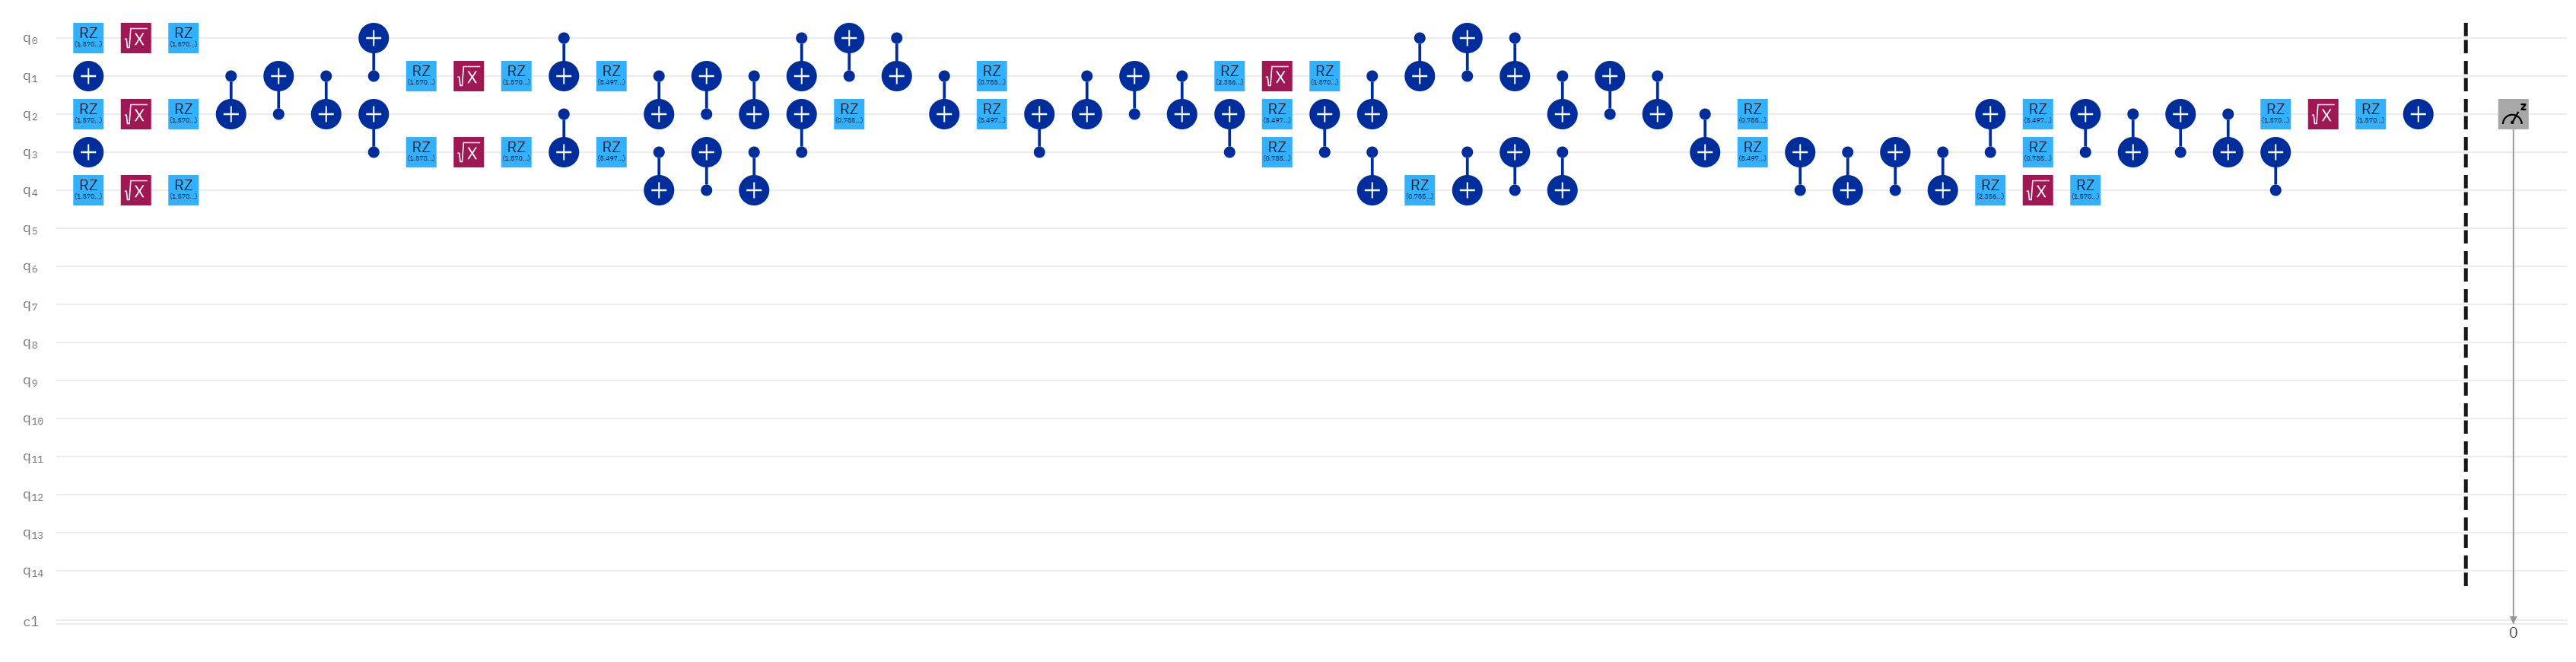

For alternatives to the canonical swap test (the one implemented here) that reduce circuit depth and therefore increase reliability when running on hardware, read [this](https://bsiegelwax.medium.com/the-simplest-way-to-compare-single-qubit-quantum-states-8ddbefa5a93e) and [this](https://arxiv.org/pdf/1803.04114.pdf).